![](https://storage.googleapis.com/kaggle-competitions/kaggle/11838/logos/header.png?t=2019-03-29-00-01-45)
# Google Landmarks Dataset v2 Exploratory Data Analysis(EDA)

## Outline
1. [Quickly View Information](#1)
    1. [Training data](#2)
    1. [Index data](#3)
    1. [Test data](#4)
1. [Detect Missing Information](#5)
    1. [Check if the data is None](#6)
    1. [Check if the data is 'None'](#7)
1. [Overall Basic Information](#8)
1. [Specific Basic Information](#9)
1. [Data Sources](#10)
1. [Reference](#11)

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Add file your path.

In [3]:
data_root = '/media/iap205/Data4T/Datasets/google-landmarks-dataset-v2'
train_file_path = os.path.join(data_root, 'train.csv')
train_img_path = os.path.join(data_root, 'train')
index_file_path = os.path.join(data_root, 'index-v2.csv')
index_img_path = os.path.join(data_root, 'index-v2')
test_file_path = os.path.join(data_root, 'test-v2.csv')
test_img_path = os.path.join(data_root, 'test-v2')

## 1 Quickly View Information

In [4]:
df_train = pd.read_csv(train_file_path)
df_index = pd.read_csv(index_file_path)
df_test = pd.read_csv(test_file_path)

### 1.1 Training data

General information

In [218]:
print("Training data size:", df_train.shape)
print("Training data columns:",df_train.columns)
print(df_train.info())

Training data size: (4132914, 3)
Training data columns: Index(['id', 'url', 'landmark_id'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132914 entries, 0 to 4132913
Data columns (total 3 columns):
id             object
url            object
landmark_id    int64
dtypes: int64(1), object(2)
memory usage: 94.6+ MB
None


Data head

In [219]:
df_train.head(3)

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914


Data sample

In [220]:
df_train.sample(3).sort_index()

,id,url,landmark_id
1384081,27729aa7162fe548,https://upload.wikimedia.org/wikipedia/commons...,59016
2387571,429c11c7edfc610f,https://upload.wikimedia.org/wikipedia/commons...,10419
3945582,2d7c04436bc2f1b4,http://upload.wikimedia.org/wikipedia/commons/...,73590


Data tail

In [221]:
df_train.tail(3)

,id,url,landmark_id
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760
4132913,8ef8dff6fc4790c2,https://upload.wikimedia.org/wikipedia/commons...,34698


Explore the specific element

In [222]:
select = [4444, 10000, 14005]
df_train.iloc[select,:]

,id,url,landmark_id
4444,3c1138a4a5369aca,http://upload.wikimedia.org/wikipedia/commons/...,51856
10000,1f889aec169bbd11,https://upload.wikimedia.org/wikipedia/commons...,15804
14005,40ad2aa19d0f15dc,https://upload.wikimedia.org/wikipedia/commons...,104756


Explore the specific element from id

In [6]:
ids = ['2c362cf42c944b61', '4aabcd2820159af2']
select = np.array([df_train[df_train['id']==id].index.to_numpy() for id in ids]).squeeze()
df_train.iloc[select,:]

,id,url,landmark_id
4063255,2c362cf42c944b61,https://upload.wikimedia.org/wikipedia/commons...,202510
1945305,4aabcd2820159af2,https://upload.wikimedia.org/wikipedia/commons...,202510


### 1.2 Index data

In [223]:
print("Index data size", df_index.shape)
print(df_index.columns)
print(df_index.info())
df_index.head(3)

Index data size (761757, 1)
Index(['id'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761757 entries, 0 to 761756
Data columns (total 1 columns):
id    761757 non-null object
dtypes: object(1)
memory usage: 5.8+ MB
None


,id
0,fdf40612109ad174
1,5a6cc67c893daea6
2,87b88acb68cdc1f1


### 1.3 Test data

In [224]:
print("Test data size", df_test.shape)
print(df_test.columns)
print(df_test.info())
df_test.head(3)

Test data size (117577, 1)
Index(['id'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117577 entries, 0 to 117576
Data columns (total 1 columns):
id    117577 non-null object
dtypes: object(1)
memory usage: 918.6+ KB
None


,id
0,00016575233bc956
1,0001aadbcd8cb923
2,0002c06b2440a5f9


## 2 Detect Missing Information

We use two ways to detect. 
### 2.1 Check if the data is None

In [225]:
print('data is None:')
missing = df_train.isnull().sum()
percent = missing/df_train.count()
missing_train_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
missing_train_data.head()

data is None:


,Missing,Percent
id,0,0.0
url,0,0.0
landmark_id,0,0.0


In [226]:
print('data is None:')
missing = df_index.isnull().sum()
percent = missing/df_index.count()
missing_index_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
missing_index_data.head()

data is None:


,Missing,Percent
id,0,0.0


In [227]:
print('data is None:')
missing = df_test.isnull().sum()
percent = missing/df_test.count()
missing_test_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
missing_test_data.head()

data is None:


,Missing,Percent
id,0,0.0


### 2.2 Check if the data is 'None'

In [228]:
print('data is \'None\':')
missing = (df_train == 'None').sum()
percent = missing/df_train.count()
missing_train_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
missing_train_data.head()

data is 'None':


/home/iap205/anaconda3/envs/pytorch/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Missing,Percent
id,0,0.0
url,0,0.0
landmark_id,0,0.0


In [229]:
print('data is \'None\':')
missing = (df_index == 'None').sum()
percent = missing/df_index.count()
missing_index_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
missing_index_data.head()

data is 'None':


,Missing,Percent
id,0,0.0


In [230]:
print('data is \'None\':')
missing = (df_test == 'None').sum()
percent = missing/df_test.count()
missing_test_data = pd.concat([missing, percent], axis=1, keys=['Missing', 'Percent'])
missing_test_data.head()

data is 'None':


,Missing,Percent
id,0,0.0


## 3 Overall Basic Information

Basic description of landmark_id

In [231]:
df_train['landmark_id'].describe()

count    4.132914e+06
mean     1.014374e+05
std      5.870421e+04
min      0.000000e+00
25%      5.005400e+04
50%      1.016280e+05
75%      1.521240e+05
max      2.030930e+05
Name: landmark_id, dtype: float64

Object containing counts of unique values

id             4132914
url            4132914
landmark_id     203094
dtype: int64


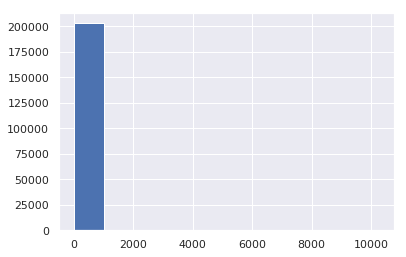

In [232]:
sns.set()
print(df_train.nunique())
df_train['landmark_id'].value_counts().hist()

Landmark_id distribuition

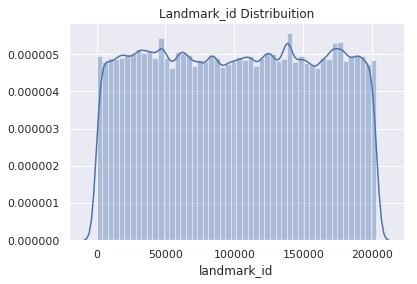

In [233]:
sns.set()
# plt.figure(figsize = (8, 5))
plt.title('Landmark_id Distribuition')
sns.distplot(df_train['landmark_id'])

Training set: number of images per class(line plot)

/home/iap205/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


[Text(0, 0.5, 'Number of images'), Text(0.5, 0, 'Landmarks')]

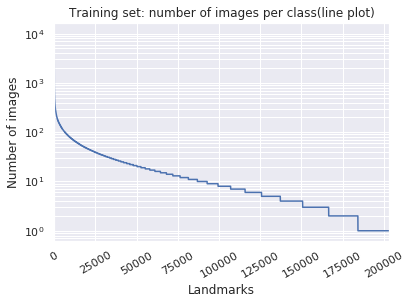

In [6]:
sns.set()
plt.title('Training set: number of images per class(line plot)')
sns.set_color_codes("pastel")
landmarks_fold = pd.DataFrame(df_train['landmark_id'].value_counts())
landmarks_fold.reset_index(inplace=True)
landmarks_fold.columns = ['landmark_id','count']
ax = landmarks_fold['count'].plot(logy=True, grid=True)
ax.grid(b=True, which='both')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

Training set: number of images per class(scatter plot)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Text(0, 0.5, 'Number of images'), Text(0.5, 0, 'Landmarks')]

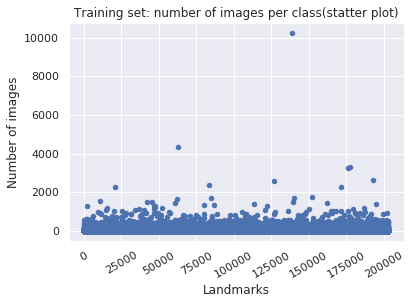

In [6]:
sns.set()
# plt.title('Training set: number of images per class')
landmarks_fold_sorted = pd.DataFrame(df_train['landmark_id'].value_counts())
landmarks_fold_sorted.reset_index(inplace=True)
landmarks_fold_sorted.columns = ['landmark_id','count']
landmarks_fold_sorted = landmarks_fold_sorted.sort_values('landmark_id')
ax = landmarks_fold_sorted.plot.scatter(\
     x='landmark_id',y='count',
     title='Training set: number of images per class(statter plot)')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

Visualize outliers, min/max or quantiles of the landmarks count

/home/iap205/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


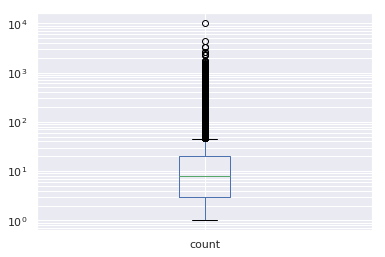

In [7]:
sns.set()
ax = landmarks_fold_sorted.boxplot(column='count')
ax.set_yscale('log')
ax.grid(b=True, which='both')

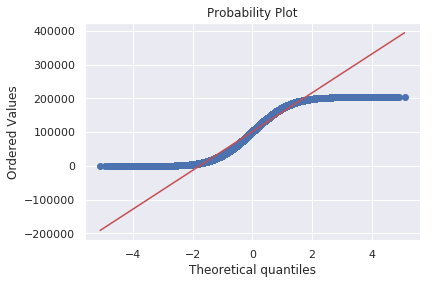

In [237]:
sns.set()
res = stats.probplot(df_train['landmark_id'], plot=plt)

## 4 Specific Basic Information

In [238]:
threshold = [2, 3, 5, 10, 20, 50, 100]
for num in threshold:    
    print("Number of classes under {}: {}/{} "
          .format(num, (df_train['landmark_id'].value_counts() < num).sum(), 
                  len(df_train['landmark_id'].unique()))
          )

Number of classes under 2: 18894/203094 
Number of classes under 3: 36631/203094 
Number of classes under 5: 65961/203094 
Number of classes under 10: 110354/203094 
Number of classes under 20: 150510/203094 
Number of classes under 50: 184669/203094 
Number of classes under 100: 196578/203094 


Most frequent landmark_ids

In [239]:
temp = pd.DataFrame(df_train.landmark_id.value_counts().head(10))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id', 'count']
temp

,landmark_id,count
0,138982,10247
1,62798,4333
2,177870,3327
3,176528,3243
4,192931,2627
5,126637,2589
6,83144,2351
7,171772,2268
8,20409,2248
9,151942,1727


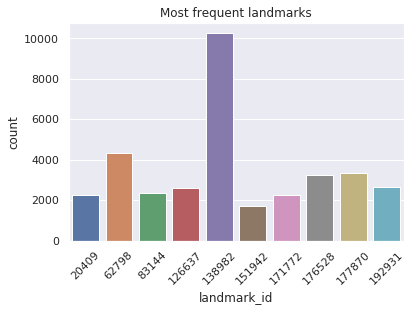

In [240]:
sns.set()
# plt.figure(figsize=(9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

Least frequent landmark_ids

In [241]:
temp = pd.DataFrame(df_train.landmark_id.value_counts().tail(10))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id', 'count']
temp

,landmark_id,count
0,131859,1
1,84859,1
2,22473,1
3,70512,1
4,127852,1
5,134828,1
6,139519,1
7,24520,1
8,17242,1
9,133954,1


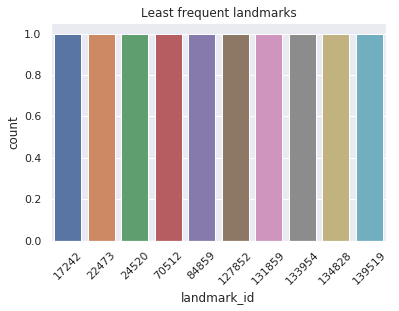

In [242]:
sns.set()
# plt.figure(figsize=(9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

## 5 Data Sources

In [243]:
# Extract site_names for train data
temp_list = list()
for path in df_train['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
df_train['site_name'] = temp_list
data_sources = pd.DataFrame(df_train['site_name'].value_counts())
data_sources.reset_index(inplace=True)
data_sources.columns = ['site_name', 'count']
data_sources.head()

,site_name,count
0,upload.wikimedia.org,4132914


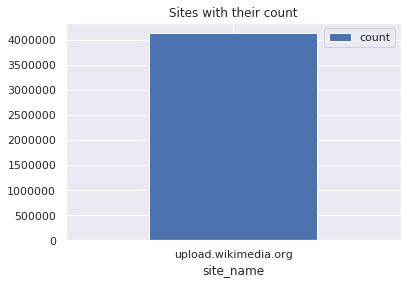

In [245]:
# Plot the Sites with their count
sns.set()
data_sources.plot.bar(x="site_name", y="count", rot=0,
                      title='Sites with their count')


## Reference
* https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis
* https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
* https://www.kaggle.com/paulorzp/train-set-landmark-exploratory-analysis
* https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners
* https://www.kaggle.com/c/landmark-retrieval-2019

